In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(columns=['Precio', 'Rating'])
df = df.append({'Precio': 10, 'Rating':10}, ignore_index=True)
df = df.append({'Precio': 11, 'Rating':10}, ignore_index=True)
df = df.append({'Precio': 12, 'Rating':10}, ignore_index=True)
df = df.append({'Precio': 13, 'Rating':10}, ignore_index=True)
df = df.append({'Precio': 14, 'Rating':13}, ignore_index=True)
df = df.append({'Precio': 15, 'Rating':20}, ignore_index=True)
df = df.append({'Precio': 17.5, 'Rating':35}, ignore_index=True)
df = df.append({'Precio': 18, 'Rating':44}, ignore_index=True)
df = df.append({'Precio': 18.5, 'Rating':52}, ignore_index=True)
df = df.append({'Precio': 19, 'Rating':55}, ignore_index=True)
df = df.append({'Precio': 21, 'Rating':80}, ignore_index=True)
df = df.append({'Precio': 22, 'Rating':83}, ignore_index=True)
df = df.append({'Precio': 23, 'Rating':80}, ignore_index=True)
df = df.append({'Precio': 24, 'Rating':83}, ignore_index=True)
df = df.append({'Precio': 25, 'Rating':85}, ignore_index=True)
df = df.append({'Precio': 28, 'Rating':100}, ignore_index=True)
df = df.append({'Precio': 29, 'Rating':100}, ignore_index=True)
df = df.append({'Precio': 30, 'Rating':100}, ignore_index=True)
df = df.append({'Precio': 31, 'Rating':100}, ignore_index=True)
df = df.append({'Precio': 31, 'Rating':100}, ignore_index=True)

print(df)

   Precio Rating
0      10     10
1      11     10
2      12     10
3      13     10
4      14     13
5      15     20
6    17.5     35
7      18     44
8    18.5     52
9      19     55
10     21     80
11     22     83
12     23     80
13     24     83
14     25     85
15     28    100
16     29    100
17     30    100
18     31    100
19     31    100


In [13]:
data = df.values[:,:1]
data_columns = list(df.columns.values[:1])
target=df.values[:,1]

reg = DecisionTreeRegressor(criterion="poisson", max_depth=2)
reg = reg.fit(data, target)


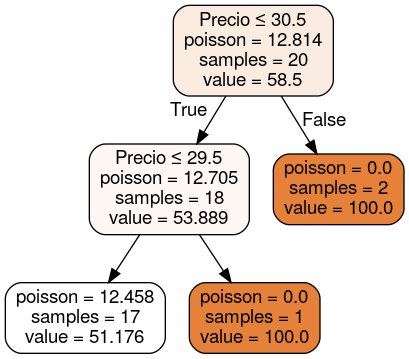

In [14]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[13 20 35.0 44 52.0 55 80 83 80 83 85 100 100 100 100 100]
70.625


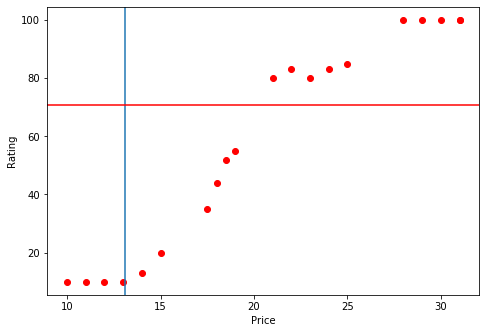

In [33]:
from statistics import mean
val_avg = df.values[4:,1]
print(val_avg)
val_avg = mean(val_avg)
print(val_avg)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(data, target, color='r')
ax.axvline(x=13.1)
ax.set_xlabel('Price')
ax.set_ylabel('Rating')
ax.axhline(y=val_avg, color='r', linestyle='-')
plt.show()